# Lab 8: Define and Solve an ML Problem of Your Choosing

In [34]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [35]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)# YOUR CODE HERE

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [36]:
print(df.shape)
print(list(df.columns))

(1562, 19)
['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


In [37]:
# exploring other features... data types, size
print(df.dtypes)
print(df.shape)

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [38]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the World Happiness Report Dataset.
2. I will be predicting the Life Ladder. Therefore, "Life Ladder" is the label for my model.
3. This is a linear regression problem, as we have a dataset with input features (generosity, positive affect, perceptions of corruption, etc.) as well as a label (the Life Ladder for a given country). The 'Life Ladder' score is a continuous numerical value, making it suitable for linear regression.
4. Key features for this model would include metrics like country, Healthy life expectancy at birth, Social support, etc. As we explore the data, we may refine this list to focus on the most predictive features.
5. Predicting the Life Ladder score is valuable for various organizations, including governments, NGOs, and international development agencies. This model could inform policy-making, guide resource allocation, and prioritize interventions that most effectively improve overall well-being. Governments could use insights to shape policies that enhance citizens' life satisfaction, while international aid organizations could assess the potential impact of different programs. Ultimately, such a model would provide actionable insights for improving quality of life on a global scale, creating value by enabling more targeted and effective approaches to enhancing societal happiness and satisfaction.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [40]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [41]:
# let us first deal with missing values!
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [42]:
# nan_detected tells us that a column has null values, not how many
nan_detected = nan_count!=0

# it only makes sense to replace the values of the features with numeric data, i.e., float64 & int 64. 
# so, we can do the following to collect those
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')

# to_impute will tell us if a given feature is both of numeric data AND has missing values
to_impute = nan_detected & is_int_or_float

to_impute_selected = df.columns[to_impute].tolist()

for colname in to_impute_selected:
    df[colname +'_na'] = df[colname].isnull()
df.head()

for colname in to_impute_selected: 
    df[colname].fillna(np.mean(df[colname]), inplace=True)
    
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

Log GDP per capita missing values count :0
Social support missing values count :0
Healthy life expectancy at birth missing values count :0
Freedom to make life choices missing values count :0
Generosity missing values count :0
Perceptions of corruption missing values count :0
Positive affect missing values count :0
Negative affect missing values count :0
Confidence in national government missing values count :0
Democratic Quality missing values count :0
Delivery Quality missing values count :0
GINI index (World Bank estimate) missing values count :0
GINI index (World Bank estimate), average 2000-15 missing values count :0
gini of household income reported in Gallup, by wp5-year missing values count :0


In [43]:
# now that the missing values have been dealt with, let us move on to removing outliers from the important (most relevant) features
correlations = df.corr()['Life Ladder'].sort_values(ascending=False)

# Remove 'Life Ladder' itself from the correlations
correlations = correlations.drop('Life Ladder')

# Print the correlations
print(correlations)

Log GDP per capita                                             0.772222
Healthy life expectancy at birth                               0.729544
Social support                                                 0.697204
Delivery Quality                                               0.672152
Democratic Quality                                             0.577380
Positive affect                                                0.552625
Freedom to make life choices                                   0.523331
Generosity                                                     0.199116
GINI index (World Bank estimate), average 2000-15_na           0.115037
Generosity_na                                                  0.082655
Perceptions of corruption_na                                   0.062805
Social support_na                                              0.052647
Positive affect_na                                             0.013685
Negative affect_na                                             0

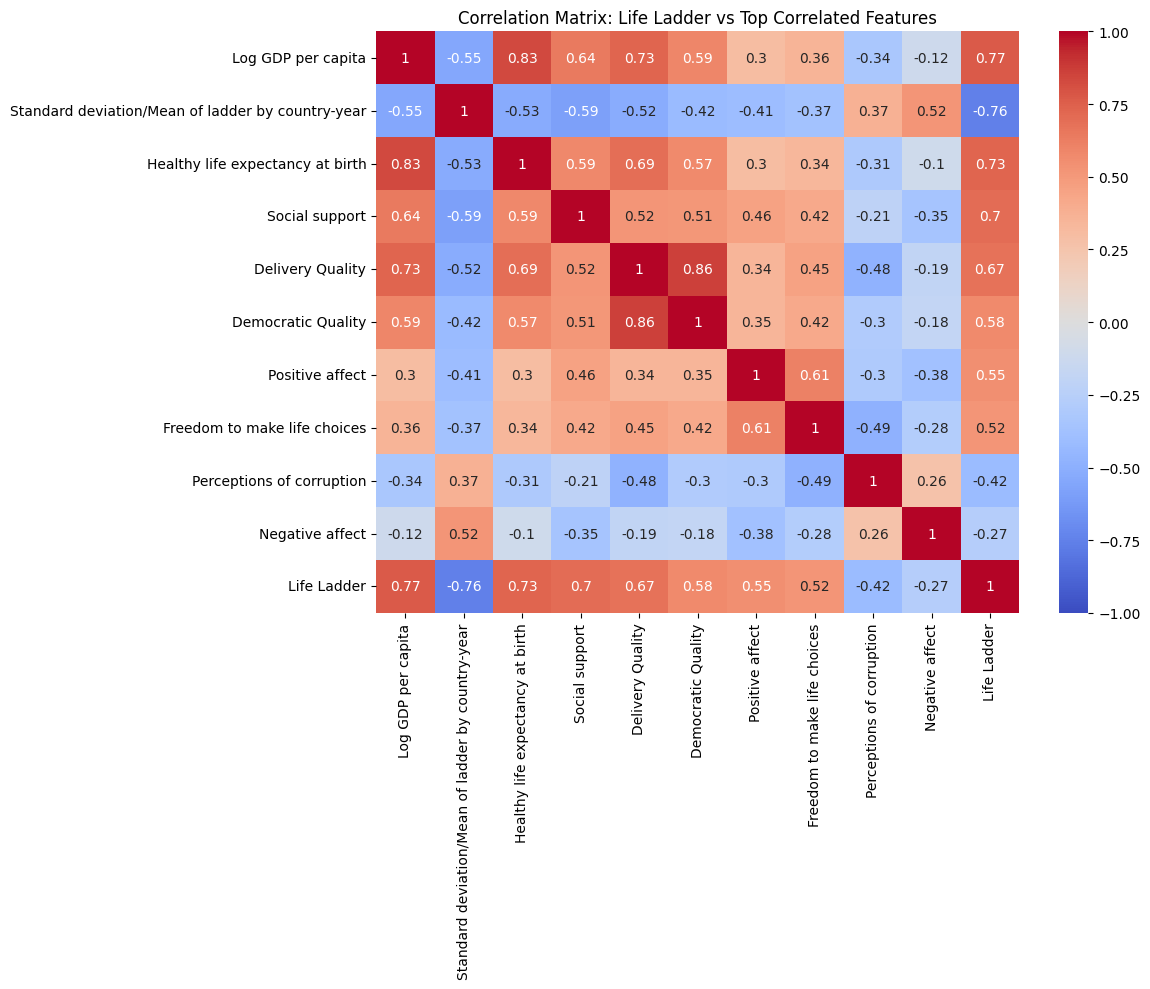

In [44]:
# Create correlation matrix to see strongest correlations. based on that, we can implement winsorizing to remove outliers
top_features = correlations.abs().nlargest(10).index.tolist()

# Create correlation matrix for selected features
corr_matrix = df[top_features + ['Life Ladder']].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: Life Ladder vs Top Correlated Features')
plt.tight_layout()
plt.show()

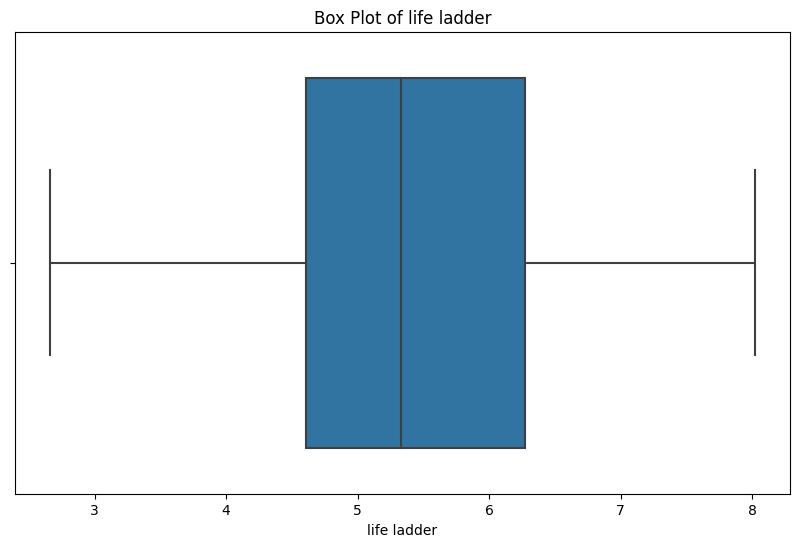

In [45]:
# first, let us deal with outliers. to observe outliers, we can use a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Life Ladder'])
plt.title('Box Plot of life ladder')
plt.xlabel('life ladder')
plt.show()

In [46]:
# no (significant) outliers in the life ladder dataset! aligns w the df.describe() aswell
# we can say this as the mean is a little lower than the max, meaning the mean is not being swayed by extremely large values

In [47]:
# using the correlation matrix. based on strength of correlation (say >0.7), we can check for outliers and clean them
# the ones with >0.7 are Log GDP per capita, Standard deviation / mean, health life expectancy at birth and delivery quantity

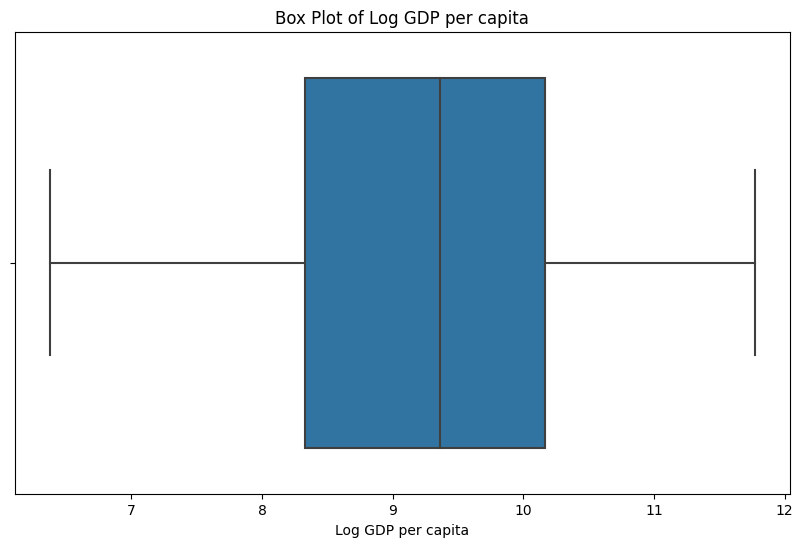

In [48]:
# first, let us deal with outliers. to observe outliers, we can use a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Log GDP per capita'])
plt.title('Box Plot of Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.show()

In [49]:
# no need to winsorize

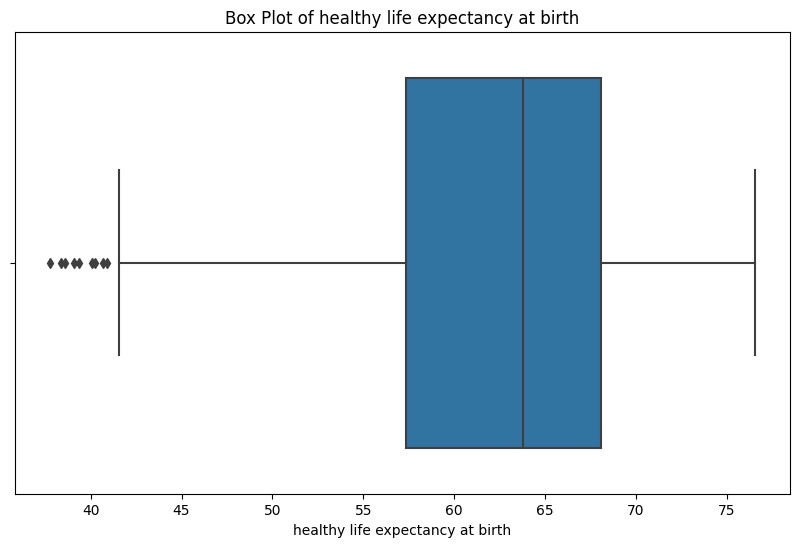

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Healthy life expectancy at birth'])
plt.title('Box Plot of healthy life expectancy at birth')
plt.xlabel('healthy life expectancy at birth')
plt.show()

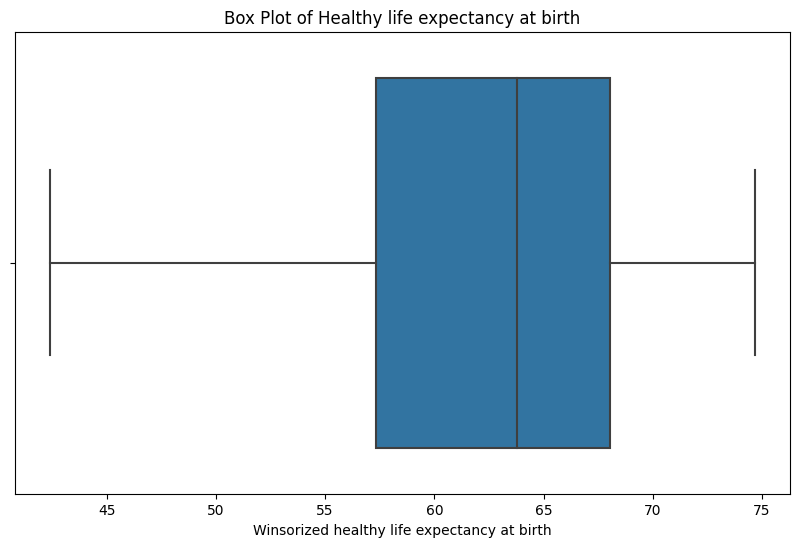

In [51]:
# we do need to clean it!
import scipy.stats as stats

# Winsorize the 'Healthy life expectancy at birth' column
df['Healthy life expectancy at birth'] = stats.mstats.winsorize(df['Healthy life expectancy at birth'], limits=[0.01, 0.01])

# Now create the box plot with the winsorized data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Healthy life expectancy at birth'])
plt.title('Box Plot of Healthy life expectancy at birth')
plt.xlabel('Winsorized healthy life expectancy at birth')
plt.show()

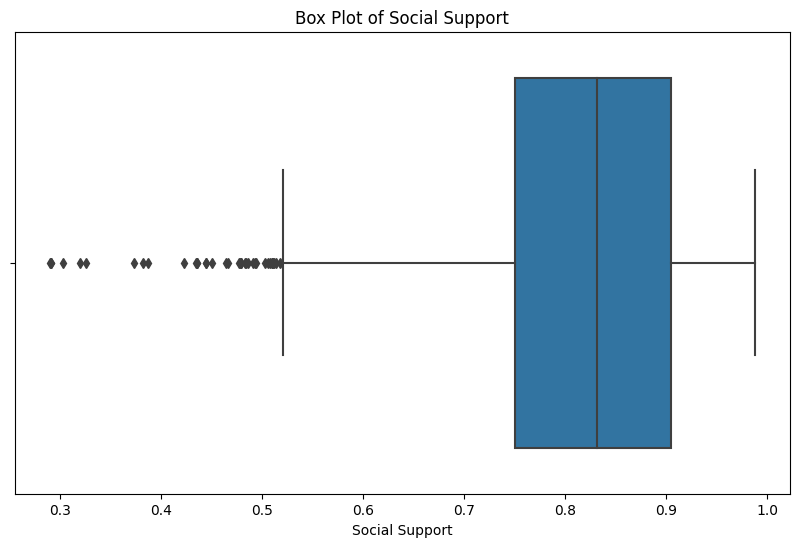

In [52]:
# first, let us deal with outliers. to observe outliers, we can use a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Social support'])
plt.title('Box Plot of Social Support')
plt.xlabel('Social Support')
plt.show()

['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year', 'Log GDP per capita_na', 'Social support_na', 'Healthy life expectancy at birth_na', 'Freedom to make life choices_na', 'Generosity_na', 'Perceptions of corruption_na', 'Positive affect_na', 'Negative affect_na', 'Confidence in national government_na', 'Democratic Quality_na', 'Delivery Quality_na', 'GINI index (World Bank estimate)_na', 'GINI index (World Bank estimate), average 2000-15_na', 'gini of household income reported in Gallup, by wp

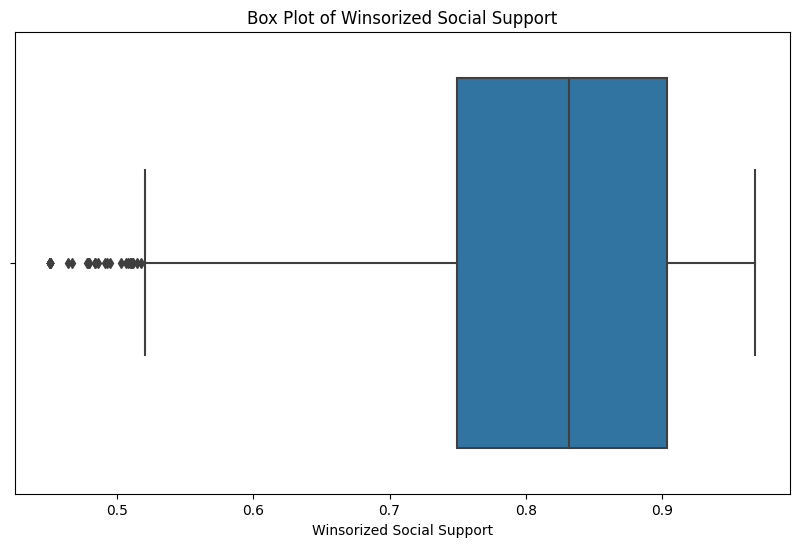

In [53]:
df['Social support'] = stats.mstats.winsorize(df['Social support'], limits=[0.01, 0.01])

# Verify the new column has been added
print(df.columns.tolist())

# Create the box plot with the winsorized data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Social support'])
plt.title('Box Plot of Winsorized Social Support')
plt.xlabel('Winsorized Social Support')
plt.show()

In [54]:
# now we can implement one hot encoding for the columns
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['country']

In [55]:
df[to_encode].nunique()

country    164
dtype: int64

In [56]:
# only one column needs to be one hot encoded - countries
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_enc.columns = encoder.get_feature_names_out(to_encode)
df_enc.head()

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df.drop(columns = to_encode, inplace=True)

In [59]:
df = df.join(df_enc)
df.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect',
       ...
       'country_United Arab Emirates', 'country_United Kingdom',
       'country_United States', 'country_Uruguay', 'country_Uzbekistan',
       'country_Venezuela', 'country_Vietnam', 'country_Yemen',
       'country_Zambia', 'country_Zimbabwe'],
      dtype='object', length=196)

In [15]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,...,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,...,0.006402,0.007682,0.007682,0.007682,0.007042,0.007042,0.007682,0.006402,0.007042,0.007682
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,...,0.079782,0.087340,0.087340,0.087340,0.083649,0.083649,0.087340,0.079782,0.083649,0.087340
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect',
       ...
       'country_United Arab Emirates', 'country_United Kingdom',
       'country_United States', 'country_Uruguay', 'country_Uzbekistan',
       'country_Venezuela', 'country_Vietnam', 'country_Yemen',
       'country_Zambia', 'country_Zimbabwe'],
      dtype='object', length=196)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I have an idea of the features list: besides the least relevant features (Freedom to make life choices, Positive affect, Negative affect, Perceptions of corruption), I will be using all the features (including the country one hot encoded feature).
2. My data preparation will involve taking all the features in X except for the above mentioned ones. In y I will only take the label (Life Ladder) and split data in a 70/30 ratio.
3. To train and improve the model, I'll start by splitting the data into training, validation, and test sets. I'll implement a couple of models, beginning with Linear Regression as a baseline, then progressing to more complex models like Gradient Boosting, and Neural Networks. Each model will be evaluated using cross-validation on the training set, with hyperparameters tuned using techniques like Grid Search. Performance will be assessed on the validation set using metrics such as MSE, R-squared, and MAE. I'll analyze feature importance to understand key factors influencing the Life Ladder score. The best-performing model, considering both accuracy and interpretability, will be selected and finally evaluated on the test set. Throughout this process, I'll be vigilant for signs of overfitting and will use techniques like regularization if necessary. This approach ensures a thorough comparison of models and aims to produce a model that generalizes well to new data while providing meaningful insights into global happiness factors.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

First we are implementing a Linear Regression model.

In [65]:
all_columns = df.columns.tolist()
exclude_columns = ['Life Ladder', 'Freedom to make life choices', 'Positive affect', 'Negative affect', 'Perceptions of corruption']
features = [col for col in all_columns if col not in exclude_columns]
X = df[features]
y = df['Life Ladder']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.03388415609745728
R-squared Score: 0.9737939989761986


Neural Network

In [67]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

nn_predictions = nn_model.predict(X_test_scaled).flatten()

2024-08-05 18:59:44.646589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-05 18:59:44.646627: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-05 18:59:44.646702: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0b18558ab8bf5aac0): /proc/driver/nvidia/version does not exist
2024-08-05 18:59:44.646918: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 18:59:44.771348: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the

GBDT - Gradient Boosted Decision Tree

In [70]:
gbdt_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_model.fit(X_train_scaled, y_train)
gbdt_predictions = gbdt_model.predict(X_test_scaled)

In [76]:
gbdt_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gbdt_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbdt_param_grid, cv=5, scoring='neg_mean_squared_error')
gbdt_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [77]:
gbdt_best = gbdt_grid.best_estimator_

In [78]:
gbdt_predictions = gbdt_best.predict(X_test_scaled)

In [79]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, nn_predictions, "Neural Network")
evaluate_model(y_test, gbdt_predictions, "Gradient Boosting")

Linear Regression - MSE: 0.0338, R2: 0.9738
Neural Network - MSE: 0.0441, R2: 0.9659
Gradient Boosting - MSE: 0.0203, R2: 0.9843


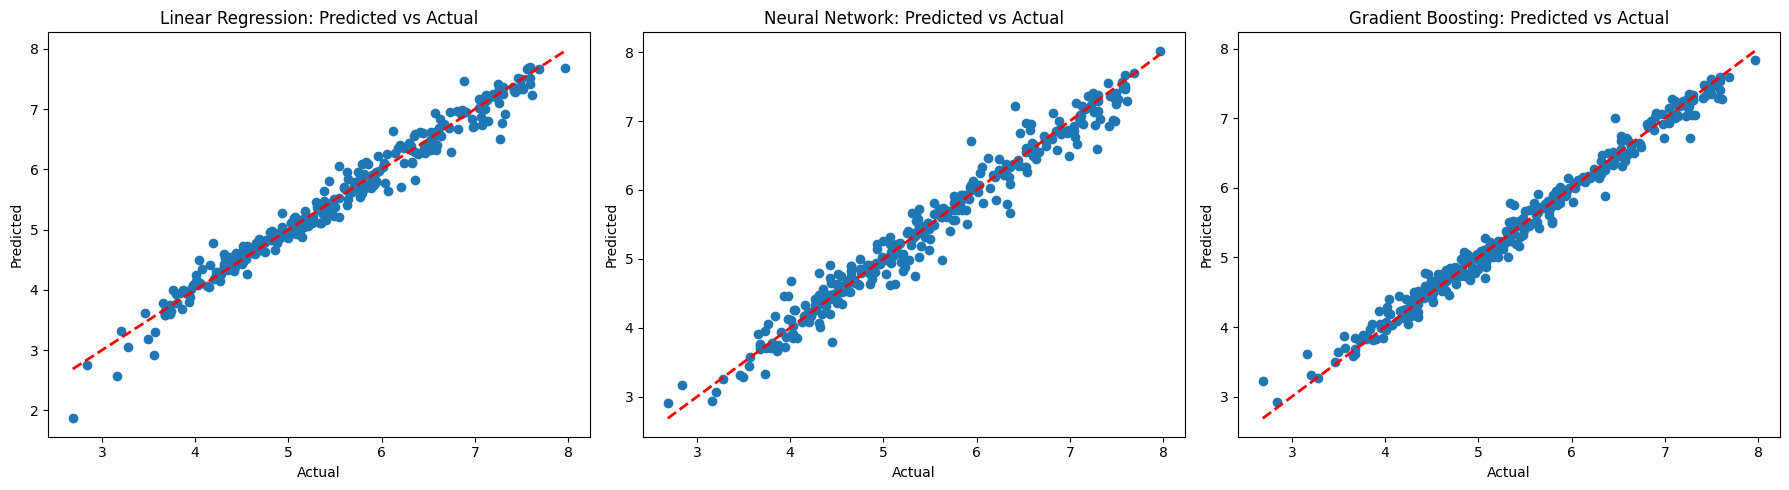

In [80]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual")

plt.subplot(1, 3, 2)
plt.scatter(y_test, nn_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network: Predicted vs Actual")

plt.subplot(1, 3, 3)
plt.scatter(y_test, gbdt_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting: Predicted vs Actual")

plt.tight_layout()
plt.show()